In [2]:

import networkx as nx #for graphs
import matplotlib.pyplot as plt #for plotting
import numpy as np
import pandas as pd

1. load the network using NetworkX and Matplotlib

In [3]:
#open the DS file facebook_combined.txt with networkx 
G = nx.read_edgelist("DS/facebook_combined.txt", delimiter=" ", nodetype=int)
          
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 4039
Number of edges: 88234


2. find the label of the node with the highest degree in the network

In [4]:
node,degree = max(G.degree(), key=lambda x: x[1])
#key is a named parameter of the max func, not a variable. We want to max by degree, so we set key to degree
degree= lambda x: x[1] 
highest_degree_node=max(G.degree(), key=degree)

print(highest_degree_node) #the whole tuple of the highest degree node
print(node) #only the corresponding node

(107, 1045)
107


3. Compute the average degree of all the nodes in the network.

In [5]:
average_degree = np.average(G.degree())
print(average_degree)

1031.3455063134438


4. Visualize the network.

KeyboardInterrupt: 

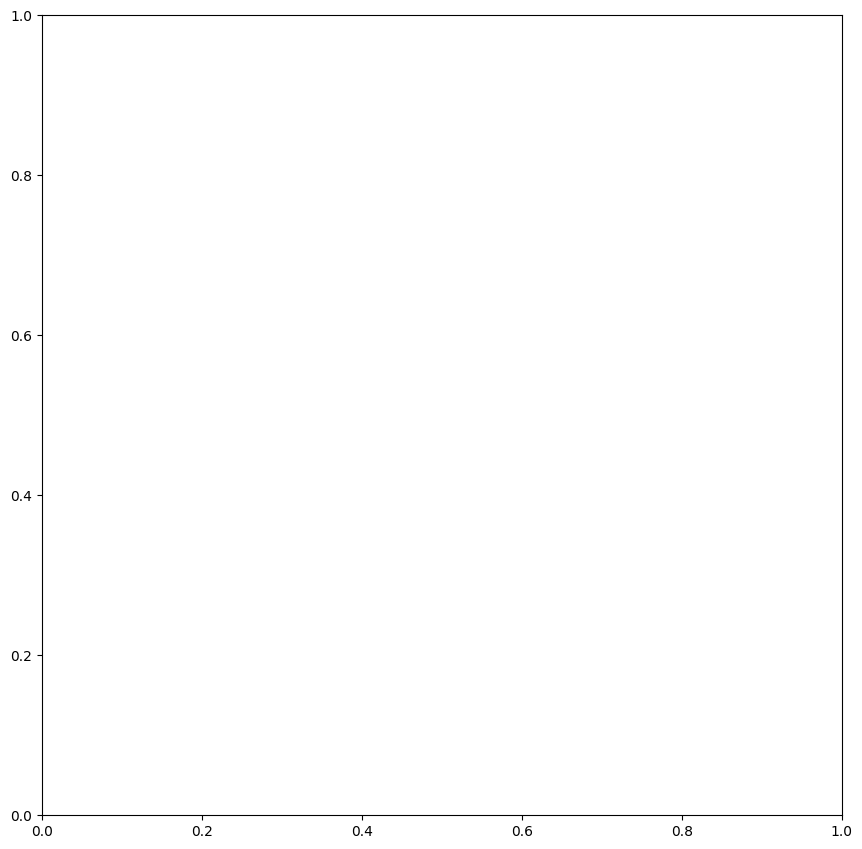

In [6]:
plt.figure(figsize=(8,8))
nx.draw(G, node_size=10,edge_color="gray",node_color="blue", with_labels=False)
plt.title("Facebook Network")
plt.show()

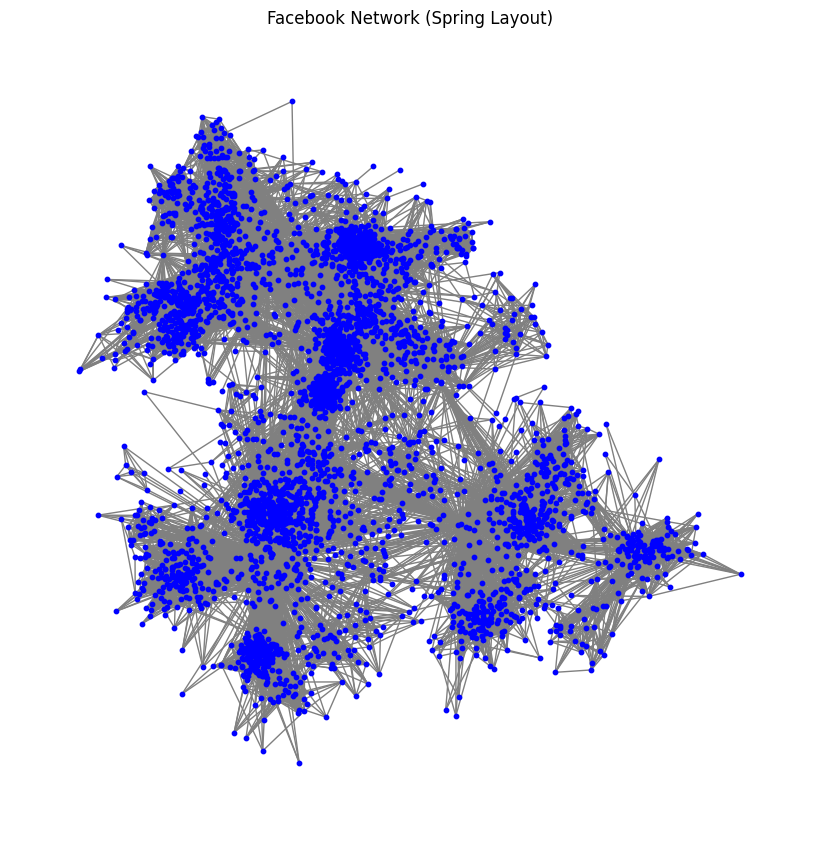

In [ ]:
plt.figure(figsize=(8, 8))

pos = nx.spring_layout(G, k=0.1) # highly connected nodes move closer together, communities often appear as blobs
#But if two groups have few edges between them,there are fewer springs pulling them together,so they drift apart.

nx.draw(
    G,
    pos,
    node_size=10,
    edge_color="gray",
    node_color="blue",
    with_labels=False
)

plt.title("Facebook Network (Spring Layout)")
plt.show()

5. Using a NetworkX function, perform a Depth-First-Search (DFS) traversal of the graph starting from user:0.
Return a list with the order of the traversed edges.

In [ ]:
dfs = nx.dfs_edges(G, source=0) #source is starting node, default is 0
print(list(dfs)) #in the form of (parent,child) -> we reached child from parent

[(0, 1), (1, 48), (48, 30), (30, 9), (9, 3), (3, 25), (25, 21), (21, 13), (13, 26), (26, 40), (40, 29), (29, 16), (16, 82), (82, 56), (56, 55), (55, 67), (67, 10), (10, 142), (142, 31), (31, 7), (7, 22), (22, 87), (87, 5), (5, 122), (122, 45), (45, 104), (104, 98), (98, 59), (59, 118), (118, 65), (65, 203), (203, 50), (50, 109), (109, 119), (119, 27), (27, 54), (54, 53), (53, 24), (24, 57), (57, 80), (80, 88), (88, 73), (73, 126), (126, 260), (260, 160), (260, 170), (170, 62), (62, 96), (96, 133), (133, 141), (141, 38), (38, 117), (117, 77), (77, 231), (231, 106), (106, 169), (169, 103), (103, 136), (136, 120), (120, 247), (120, 277), (277, 39), (39, 69), (69, 105), (105, 148), (148, 113), (113, 66), (66, 134), (134, 132), (132, 72), (72, 165), (165, 121), (121, 206), (206, 178), (178, 186), (186, 123), (123, 200), (200, 75), (75, 85), (85, 156), (156, 188), (188, 79), (79, 185), (185, 271), (271, 63), (63, 261), (261, 172), (172, 128), (128, 150), (150, 64), (64, 100), (100, 163), (16

Task 3:
DS used: wikispeedia,

In [7]:

#load edges
#had to clean data #links=pd.read_csv("DS/wikispeedia_paths-and-graph/links.tsv", sep="\t",names=["from","to"]) #links contains the edged of the graph

links = pd.read_csv(
    "DS/wikispeedia_paths-and-graph/links.tsv",
    sep="\t",
    comment="#",        # Ignore comment lines
    header=None,
    names=["from", "to"]
)

# Remove rows that contain NaN
links = links.dropna()

#create graph using DiGraph cuz wikipedia links are directed, load with pandas
G2=nx.from_pandas_edgelist(links, source="from", target="to", create_using=nx.DiGraph()) #create graph from the edges in links, source and target are the column names in links that contain the nodes of the edges
print("Number of nodes:", G2.number_of_nodes())
print("Number of edges:", G2.number_of_edges())
print(G2.is_directed())
print(nx.density(G2))  #how full the graph is , density = E/ N(N-1) for directed graphs

# Print first 10 nodes
print(list(G2.nodes())[:10]) #shows if we need to clean data, in our case we do
print(type(list(G2.nodes())[0])) #we want class str here


Number of nodes: 4592
Number of edges: 119882
True
0.005686496910710776
['%C3%81ed%C3%A1n_mac_Gabr%C3%A1in', 'Bede', 'Columba', 'D%C3%A1l_Riata', 'Great_Britain', 'Ireland', 'Isle_of_Man', 'Monarchy', 'Orkney', 'Picts']
<class 'str'>


In [8]:
in_degrees=dict(G2.in_degree()) #in degree of each node, dict cuz we want to use it for plotting
out_degrees=dict(G2.out_degree()) 

print("Average in-degree:", np.average(list(in_degrees.values()))) #same as above but using numpy
print("Average out-degree:", sum(out_degrees.values()) / len(out_degrees))

Average in-degree: 26.10670731707317
Average out-degree: 26.10670731707317


In [9]:
most_connected = max(G2.degree(), key=lambda x: x[1])
print("Most connected node:", most_connected)

#sss: strongly connnected components: there is a path from every node to every other node following direction
scc=list(nx.strongly_connected_components(G2))
print("Number of strongly connected components:", len(scc))

Most connected node: ('United_States', 1845)
Number of strongly connected components: 519


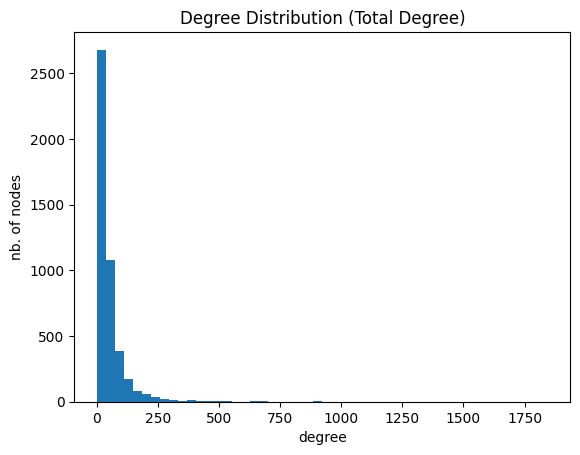

In [10]:
# Degree Distribution visualization

degrees = [d for n, d in G2.degree()]

plt.figure
plt.hist(degrees, bins=50) #histogram with 50 bars
plt.title("Degree Distribution (Total Degree)")
plt.xlabel("degree")
plt.ylabel("nb. of nodes")
plt.show()

In [11]:
#DFS

start_node = most_connected[0] # USA in our case
dfs_edges = list(nx.dfs_edges(G2, source=start_node))

print("first 20 DFS edges:")
print(dfs_edges[:20])


first 20 DFS edges:
[('United_States', 'Abraham_Lincoln'), ('Abraham_Lincoln', 'Aircraft_carrier'), ('Aircraft_carrier', 'Afghanistan'), ('Afghanistan', '18th_century'), ('18th_century', '10th_century'), ('10th_century', '11th_century'), ('11th_century', '12th_century'), ('12th_century', '13th_century'), ('13th_century', '14th_century'), ('14th_century', '15th_century'), ('15th_century', '16th_century'), ('16th_century', '17th_century'), ('17th_century', '19th_century'), ('19th_century', '1st_century'), ('1st_century', '1st_century_BC'), ('1st_century_BC', '20th_century'), ('20th_century', '21st_century'), ('21st_century', '2004_Indian_Ocean_earthquake'), ('2004_Indian_Ocean_earthquake', '1755_Lisbon_earthquake'), ('1755_Lisbon_earthquake', 'Atlantic_Ocean')]


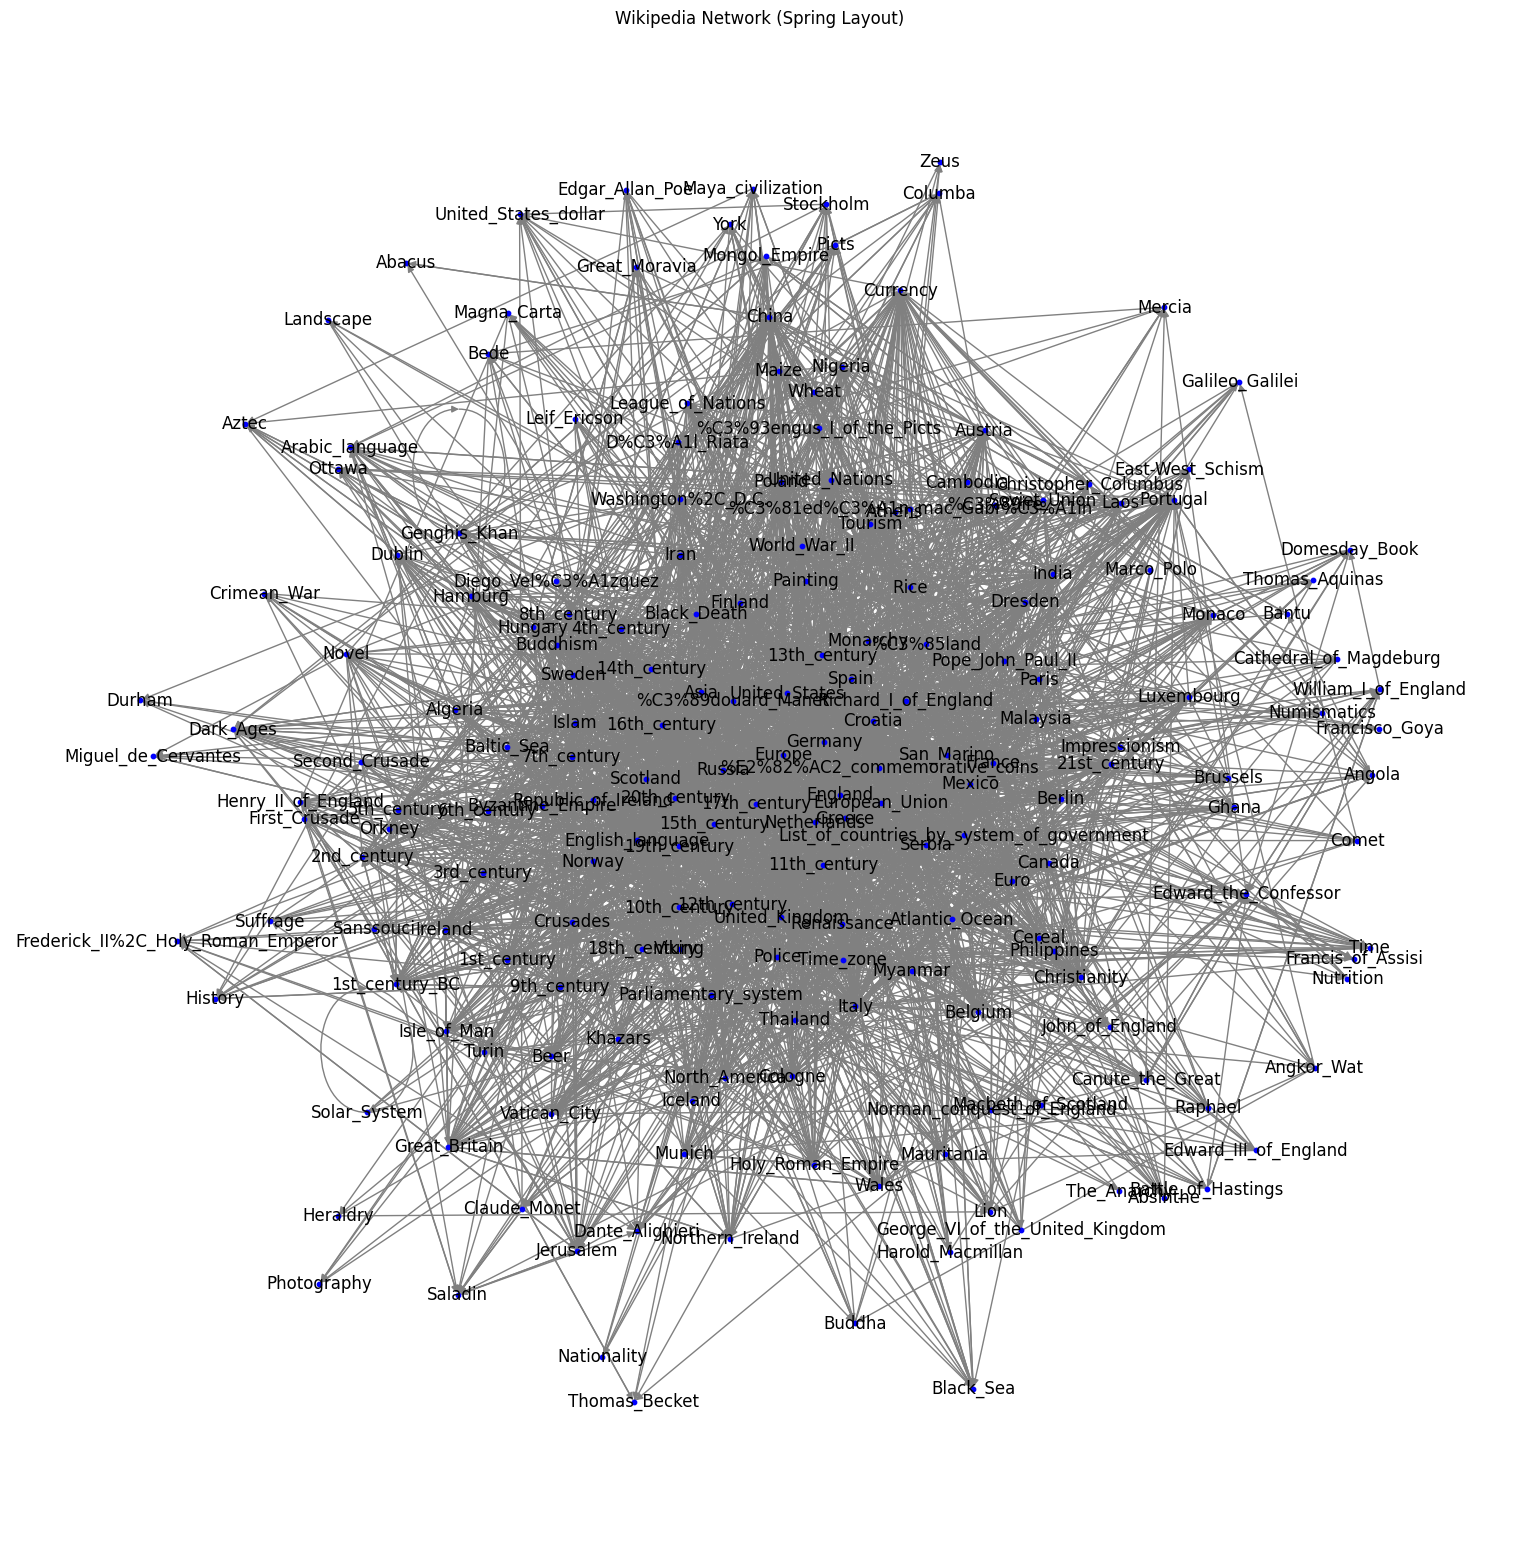

In [13]:
#Visualization of the directed graph

sample_nodes = list(G2.nodes())[:200]
subG = G2.subgraph(sample_nodes)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(subG, k=1)
nx.draw(
    subG,
    pos,
    node_size=10,
    edge_color="gray",
    node_color="blue",
    with_labels=True,
    arrows=True
)
plt.title("Wikipedia Network (Spring Layout)")
plt.show()